# Exploring the MovieLens Dataset

## Practive Prof-Uploaded Code

In [11]:
import pandas as pd
import numpy as np

In [12]:
data = pd.read_csv('../data/movie_lens_genre_separated.tsv', sep='\t')

In [13]:
#First 5 instances/rows
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Animation
1,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Children's
2,2917,2355,2,971730180,M,25,0,60201,"Bug's Life, A (1998)",Comedy
3,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Animation
4,2924,2355,4,971592069,F,18,4,94121,"Bug's Life, A (1998)",Children's


In [14]:
# Mean ratings for film by gender
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [15]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [16]:
# Aggregate by title feature
ratings_by_title = data.groupby('title').size()

In [17]:
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            74
'Night Mother (1986)              70
'Til There Was You (1997)        104
'burbs, The (1989)               303
...And Justice for All (1979)    398
dtype: int64

In [18]:
# Aggregated titles with condition
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [19]:
active_titles[:5]

Index([''burbs, The (1989)', '...And Justice for All (1979)',
       '10 Things I Hate About You (1999)', '101 Dalmatians (1961)',
       '101 Dalmatians (1996)'],
      dtype='object', name='title')

In [20]:
# Mean ratings of aggregated titles with condition
mean_ratings = mean_ratings.loc[active_titles]

In [21]:
mean_ratings[:5]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


In [22]:
# Mean ratings sorted by top female ratings
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [23]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Grand Illusion (Grande illusion, La) (1937)",4.560976,4.266129
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611


In [24]:
# Mean ratings sorted by top male ratings
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)

In [25]:
top_male_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
Paths of Glory (1957),4.392857,4.485149
"Wrong Trousers, The (1993)",4.588235,4.478261


In [26]:
# New mean feature (difference in means = most divisive ratings between M and F)
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [27]:
# Mean ratings sorted by greatest diff and preferred by women
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [28]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Cutthroat Island (1995),3.200000,2.341270,-0.858730
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Home Alone 3 (1997),2.486486,1.683761,-0.802726
That Darn Cat! (1997),3.156250,2.435484,-0.720766
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Dracula: Dead and Loving It (1995),2.892857,2.250000,-0.642857
"Pagemaster, The (1994)",3.146341,2.510638,-0.635703
Grease (1978),3.975265,3.367041,-0.608224
Herbie Goes Bananas (1980),2.965517,2.373333,-0.592184


In [29]:
# Mean ratings sorted by greatest diff and preferred by men
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
Lifeforce (1985),2.250000,2.994152,0.744152
Marked for Death (1990),2.100000,2.837607,0.737607
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
No Escape (1994),2.300000,2.994048,0.694048
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985


In [30]:
# Format occupations and age groups better
occupation_dict = {
    0: "not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer"
}

age_dict = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}

In [31]:
data['age'] = [age_dict[x] for x in data['age']]
data['occupation'] = [occupation_dict[x] for x in data['occupation']]

In [32]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Animation
1,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Children's
2,2917,2355,2,971730180,M,25-34,not specified,60201,"Bug's Life, A (1998)",Comedy
3,2924,2355,4,971592069,F,18-24,college/grad student,94121,"Bug's Life, A (1998)",Animation
4,2924,2355,4,971592069,F,18-24,college/grad student,94121,"Bug's Life, A (1998)",Children's


## Homework (my code)

#### An aggregate of the movie ratings for each particular genre.

In [62]:
ratings_by_genre = data.pivot_table('rating', index='genres', aggfunc='mean')
ratings_by_genre

,rating
genres,
Action,3.491185
Adventure,3.477257
Animation,3.684895
Children's,3.422087
Comedy,3.522107
Crime,3.708679
Documentary,3.933123
Drama,3.766332
Fantasy,3.447371


#### The top 5 highest ranked genre by occupation.

In [34]:
rank_by_occupation = data.pivot_table('rating', index='genres', columns='occupation', aggfunc='mean')
rank_by_occupation

# # Attempt to iterate through each occupation and add top 5 ranked genres to array for a new table
# def sort_occupation_ranks():
#     occ = data['occupation']
#     genre = data['genres']
#     top5 = []
#     # Iterate through each occupation/feature
#     for i in occ:
#         # Add name of occupation to list
#         top5.append(occ[i])
#         # Get index of top 5 ratings
#         index = np.argpartition(occ, -5)[-5:]
#         # Add corresponding genre index of top 5 to list
#         for j in index:
#             top5.append(genre[index[j]])
#     return top5

occupation,K-12 student,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,...,not specified,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
genres,,,,,,,,,,,,,,,,,,,,,
Action,3.497116,3.392063,3.457569,3.549025,3.453687,3.494995,3.564004,3.568687,3.449309,3.601525,...,3.417847,3.575455,3.679048,3.528136,3.559685,3.510326,3.567827,3.475220,3.310577,3.339971
Adventure,3.425658,3.424278,3.443535,3.556486,3.419877,3.478934,3.553981,3.509195,3.397727,3.688992,...,3.425616,3.564958,3.650803,3.520496,3.567662,3.513258,3.560600,3.430316,3.287975,3.346110
Animation,3.463956,3.693399,3.624133,3.822104,3.655775,3.766940,3.681150,3.698059,3.529851,3.797980,...,3.674843,3.706839,3.545732,3.761057,3.847805,3.729696,3.734456,3.748663,3.395221,3.699623
Children's,3.220679,3.459286,3.377481,3.609614,3.346854,3.513463,3.485747,3.442969,3.229885,3.667447,...,3.438479,3.432778,3.485849,3.521694,3.592405,3.457459,3.481376,3.395288,2.973435,3.351509
Comedy,3.497200,3.519583,3.504449,3.601516,3.486595,3.474962,3.585793,3.517354,3.481363,3.579862,...,3.492581,3.598995,3.663825,3.553581,3.687170,3.507570,3.581307,3.445350,3.401392,3.423011
Crime,3.687085,3.659342,3.678039,3.742811,3.723450,3.696655,3.802857,3.736324,3.575758,3.642346,...,3.652772,3.768506,3.832487,3.734596,3.801012,3.737569,3.713289,3.635569,3.634085,3.651598
Documentary,3.581633,3.984887,4.028933,3.852632,3.962887,3.886598,4.013245,3.915134,3.900000,3.800000,...,3.854545,3.844221,3.970588,3.917763,3.987500,3.933492,4.024129,3.640000,3.727273,3.967914
Drama,3.782167,3.754293,3.732216,3.790601,3.748794,3.739991,3.871756,3.766663,3.627545,3.791185,...,3.743350,3.840207,3.949047,3.788018,3.836070,3.791983,3.800158,3.738553,3.619308,3.653348
Fantasy,3.298039,3.456388,3.424432,3.472675,3.363636,3.431478,3.486842,3.471070,3.407895,3.606357,...,3.426315,3.497192,3.678019,3.600000,3.545362,3.494278,3.528097,3.420833,3.230900,3.338421


#### The most popular (with most ratings) movie by age group.

In [35]:
rating_count_by_ages = data.pivot_table('rating', index='age', columns='title', aggfunc='count')
rating_count_by_ages

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
age,,,,,,,,,,,,,,,,,,,,,
18-24,12.0,3.0,16.0,90.0,14.0,NaN,506.0,244.0,124.0,92.0,...,21.0,162.0,4.0,31.0,NaN,1.0,120.0,NaN,4.0,249.0
25-34,22.0,26.0,48.0,115.0,116.0,1.0,522.0,378.0,224.0,208.0,...,31.0,495.0,2.0,54.0,NaN,16.0,288.0,NaN,6.0,549.0
35-44,30.0,21.0,20.0,55.0,140.0,NaN,136.0,230.0,186.0,120.0,...,18.0,210.0,6.0,15.0,NaN,9.0,92.0,2.0,6.0,222.0
45-49,2.0,6.0,6.0,11.0,40.0,NaN,62.0,86.0,58.0,62.0,...,4.0,96.0,2.0,4.0,1.0,1.0,34.0,NaN,1.0,81.0
50-55,8.0,9.0,4.0,24.0,58.0,NaN,54.0,80.0,50.0,66.0,...,2.0,111.0,6.0,1.0,1.0,1.0,36.0,NaN,NaN,72.0
56+,NaN,3.0,6.0,6.0,28.0,1.0,10.0,42.0,18.0,51.0,...,2.0,54.0,NaN,1.0,NaN,NaN,16.0,NaN,NaN,15.0
Under 18,NaN,2.0,4.0,2.0,2.0,NaN,110.0,70.0,68.0,17.0,...,1.0,9.0,NaN,3.0,NaN,1.0,16.0,NaN,6.0,42.0


In [36]:
max_age_count = rating_count_by_ages.max(axis=1)
max_age_count

age
18-24       2930.0
25-34       5880.0
35-44       2990.0
45-49       1130.0
50-55       1030.0
56+          565.0
Under 18     500.0
dtype: float64

In [37]:
# HOW TO ITERATE THROUGH EACH ROW AND GET THE TITLE THAT CONTAINS EACH OF THE ABOVE VALUES?

#### A breakdown of a movie’s ratings by occupation, using any movie of your choice.

In [38]:
ratings_by_occupation = data.pivot_table(index='occupation', columns='title', aggfunc='count')
ratings_by_occupation

age                       \
title                $1,000,000 Duck (1971) 'Night Mother (1986)   
occupation                                                         
K-12 student                            NaN                  1.0   
academic/educator                      12.0                  7.0   
artist                                  NaN                  3.0   
clerical/admin                          2.0                  5.0   
college/grad student                   10.0                  6.0   
customer service                        2.0                  4.0   
doctor/health care                      6.0                  4.0   
executive/managerial                    6.0                 11.0   
farmer                                  NaN                  NaN   
homemaker                               6.0                  NaN   
lawyer                                  NaN                  1.0   
not specified                          10.0                 13.0   
programmer                              2.0                  NaN   
retired                                 2.0                  3.0   
sales/marketing                         NaN                  2.0   
scientist                               NaN                  2.0   
self-employed                           2.0                  1.0   
technician/engineer                     4.0                  2.0   
tradesman/craftsman                     NaN                  2.0   
unemployed                              4.0                  NaN   
writer                                  6.0                  3.0   

                                                                   \
title                'Til There Was You (1997) 'burbs, The (1989)   
occupation                                                          
K-12 student                               4.0                1.0   
academic/educator                         12.0               24.0   
artist                                     4.0               20.0   
clerical/admin                            10.0               18.0   
college/grad student                      12.0               45.0   
customer service                           NaN               12.0   
doctor/health care                         8.0                8.0   
executive/managerial                      14.0               26.0   
farmer                                     NaN                1.0   
homemaker                                  NaN                5.0   
lawyer                                     2.0                4.0   
not specified                              6.0               31.0   
programmer                                 2.0               15.0   
retired                                    2.0                NaN   
sales/marketing                           10.0               16.0   
scientist                                  NaN                5.0   
self-employed                              4.0               12.0   
technician/engineer                        4.0               24.0   
tradesman/craftsman                        2.0               10.0   
unemployed                                 2.0                5.0   
writer                                     6.0               21.0   

                                                                 \
title                ...And Justice for All (1979) 1-900 (1994)   
occupation                                                        
K-12 student                                   2.0          NaN   
academic/educator                             40.0          NaN   
artist                                        12.0          NaN   
clerical/admin                                16.0          NaN   
college/grad student                          18.0          NaN   
customer service                               8.0          NaN   
doctor/health care                            18.0          1.0   
executive/managerial                          66.0          NaN   
farmer       

In [42]:
# HOW TO SELECT ONE FEATURE/COLUMN
# ratings_by_occupation = ratings_by_occupation.loc[ratings_by_occupation['title'] == '101 Dalmations (1996)']
# ratings_by_occupation = ratings_by_occupation['101 Dalmatians (1996)']
# ratings = ratings_by_occupation.drop('101 Dalmations (1961)')

#### A function that given a user id, returns: (1) this user’s age and occupation, (2) the average rating given by this user, and (3) his highest and lowest rated movie(s)

In [40]:
def user_info(id):
    age = data.loc[data['user_id'] == id, 'age'].iloc[0]
    occupation = data.loc[data['user_id'] == id, 'occupation'].iloc[0]
    # First get all users' average ratings
    all_average_ratings = data.pivot_table('rating', index='user_id', aggfunc='mean')
    # Then specific user's average
    average_rating = all_average_ratings.ix[id, 'rating']
#     average_rating.loc[average_rating['user_id'] == id, 'rating']
    
#     movie_ratings = data.pivot_table(index='user_id', columns='title') # too large!
#     movie_ratings = movie_ratings.ix[id, 'rating']
#     highest_rated_movie = 
#     lowest_rated_movie = 
#     return "1) age: " + age
#         + " and occupation: " + occupation
#         + "\n2) average rating given: " + average_rating
#         + "\n3) highest rated movie(s): " + hightest_rated_movie
#         + " and lowest rated movie(s): " + lowest_rated_movie
    print(age + ', ' + occupation)
    print(average_rating)
    print(all_average_ratings)
#     print(movie_ratings)

user_info(6040)
# HOW TO CORRECTLY GET AVERAGE
# HOW TO GET MOVIES WITH HIGHEST RATING
# GET MOVIES WITH LOWEST RATING

25-34, doctor/health care
3.570480928689884
           rating
user_id          
1        4.198276
2        3.670139
3        3.910569
4        3.982759
5        3.127841
...           ...
6036     3.274394
6037     3.757353
6038     3.780488
6039     3.859206
6040     3.570481

[6040 rows x 1 columns]


/home/clara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys


#### Some other statistic, figure, aggregate, or plot that you created using this dataset, along with a short description of what interesting observations you derived from it.

In [93]:
# rating_mean_by_ages = data.pivot_table('rating', index='age', aggfunc='mean')
# rating_mean_by_ages = data.pivot_table('rating', columns='age', aggfunc='mean')
rating_mean_by_ages = data.pivot_table('rating', index='age', aggfunc='mean')
rating_mean_by_ages

# HOW TO STRUCTURE TABLE TO PLOT THE INFORMATION I WANT -- OR IS THIS DONE IN THE GRAPH CODE?

,rating
age,
18-24,3.509613
25-34,3.547199
35-44,3.622463
45-49,3.641898
50-55,3.715984
56+,3.758113
Under 18,3.536093


Text(0.5, 0, 'age group')

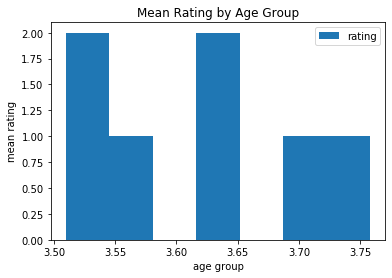

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt

rating_mean_by_ages.plot.hist(bins=7)
plt.title("Mean Rating by Age Group")
plt.ylabel('mean rating')
plt.xlabel('age group')

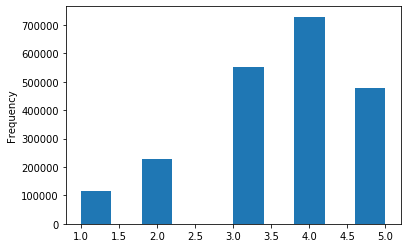

In [76]:
data.rating.plot.hist(bins=10)